# Import Required Libraries
Import the necessary libraries, including OpenCV, NumPy, and Matplotlib.

In [1]:
# Import Required Libraries

import cv2  # OpenCV for image processing
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting images

# Load Images
Load the set of images to be used for edge detection.

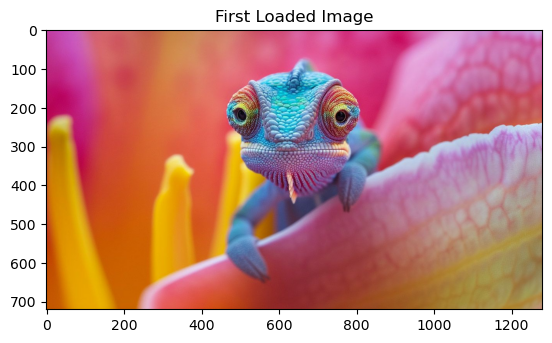

In [2]:
# Load Images

import os


# Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images


# Specify the folder containing the images
image_folder = "images"

# Load the images
images = load_images_from_folder(image_folder)

# Display the first image to verify loading
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
plt.title("First Loaded Image")
plt.show()

# Apply Gaussian Edge Detection
Apply the Gaussian edge detection method to the loaded images.

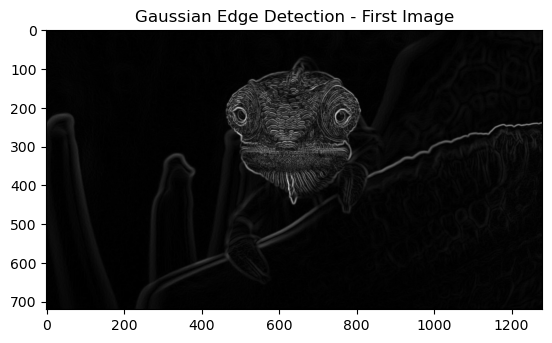

In [3]:
# Apply Gaussian Edge Detection

# Function to apply Gaussian edge detection
def apply_gaussian_edge_detection(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply GaussianBlur to the grayscale image
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    # Use the Sobel operator to find the gradient of the image
    sobelx = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=5)
    # Calculate the magnitude of the gradient
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    # Normalize the magnitude to the range [0, 255]
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    return magnitude

# Apply Gaussian edge detection to all loaded images
gaussian_edges = [apply_gaussian_edge_detection(image) for image in images]

# Display the first image with Gaussian edge detection applied
plt.imshow(gaussian_edges[0], cmap='gray')
plt.title('Gaussian Edge Detection - First Image')
plt.show()

# Apply Sobel Edge Detection
Apply the Sobel edge detection method to the loaded images.

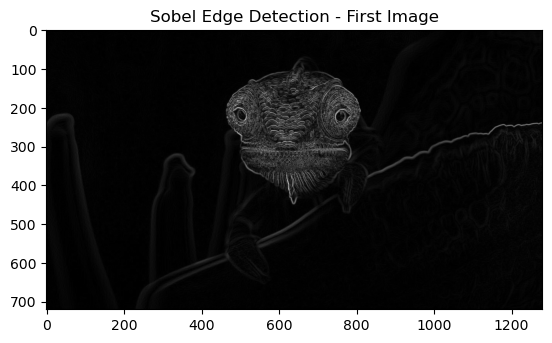

In [4]:
# Apply Sobel Edge Detection

# Function to apply Sobel edge detection
def apply_sobel_edge_detection(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Sobel operator to find the gradient in the x direction
    sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
    # Apply Sobel operator to find the gradient in the y direction
    sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
    # Calculate the magnitude of the gradient
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    # Normalize the magnitude to the range [0, 255]
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    return magnitude

# Apply Sobel edge detection to all loaded images
sobel_edges = [apply_sobel_edge_detection(image) for image in images]

# Display the first image with Sobel edge detection applied
plt.imshow(sobel_edges[0], cmap='gray')
plt.title('Sobel Edge Detection - First Image')
plt.show()

# Apply Canny Edge Detection
Apply the Canny edge detection method to the loaded images.

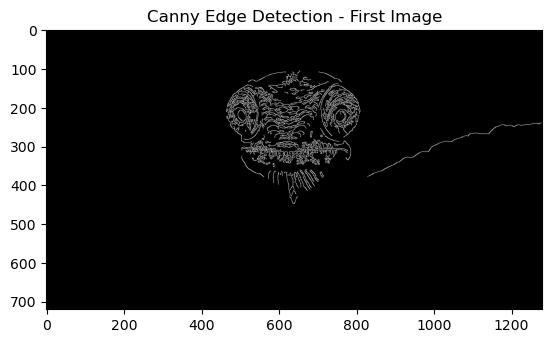

In [5]:
# Apply Canny Edge Detection

# Function to apply Canny edge detection
def apply_canny_edge_detection(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply GaussianBlur to the grayscale image
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    # Apply Canny edge detection
    edges = cv2.Canny(blurred_image, 100, 200)
    return edges

# Apply Canny edge detection to all loaded images
canny_edges = [apply_canny_edge_detection(image) for image in images]

# Display the first image with Canny edge detection applied
plt.imshow(canny_edges[0], cmap='gray')
plt.title('Canny Edge Detection - First Image')
plt.show()

# Measure Edge Detection Accuracy
Measure the edge detection accuracy for each method using appropriate metrics.

In [6]:
# Measure Edge Detection Accuracy

# Function to calculate edge detection accuracy using Intersection over Union (IoU)
def calculate_iou(edge_image1, edge_image2):
    # Convert edge images to binary format
    edge_image1_binary = (edge_image1 > 0).astype(np.uint8)
    edge_image2_binary = (edge_image2 > 0).astype(np.uint8)
    
    # Calculate intersection and union
    intersection = np.logical_and(edge_image1_binary, edge_image2_binary).sum()
    union = np.logical_or(edge_image1_binary, edge_image2_binary).sum()
    
    # Calculate IoU
    iou = intersection / union if union != 0 else 0
    return iou

# Function to measure edge detection accuracy for all methods
def measure_edge_detection_accuracy(original_images, gaussian_edges, sobel_edges, canny_edges):
    accuracies = {
        'Gaussian': [],
        'Sobel': [],
        'Canny': []
    }
    
    for i in range(len(original_images)):
        # Use Canny edges as the ground truth for comparison
        ground_truth_edges = canny_edges[i]
        
        # Calculate IoU for Gaussian edges
        gaussian_iou = calculate_iou(ground_truth_edges, gaussian_edges[i])
        accuracies['Gaussian'].append(gaussian_iou)
        
        # Calculate IoU for Sobel edges
        sobel_iou = calculate_iou(ground_truth_edges, sobel_edges[i])
        accuracies['Sobel'].append(sobel_iou)
        
        # Calculate IoU for Canny edges (self-comparison)
        canny_iou = calculate_iou(ground_truth_edges, canny_edges[i])
        accuracies['Canny'].append(canny_iou)
    
    return accuracies

# Measure edge detection accuracy for all methods
accuracies = measure_edge_detection_accuracy(images, gaussian_edges, sobel_edges, canny_edges)

# Display the accuracy results
print("Edge Detection Accuracy (IoU):")
print("Gaussian:", np.mean(accuracies['Gaussian']))
print("Sobel:", np.mean(accuracies['Sobel']))
print("Canny:", np.mean(accuracies['Canny']))

Edge Detection Accuracy (IoU):
Gaussian: 0.021311992142892085
Sobel: 0.021321472964086055
Canny: 1.0


# Measure Computational Efficiency
Measure the computational efficiency of each method by recording the time taken to process the images.

In [7]:
import time

# Function to measure computational efficiency
def measure_computational_efficiency(images, edge_detection_function):
    times = []
    for image in images:
        start_time = time.time()
        edge_detection_function(image)
        end_time = time.time()
        times.append(end_time - start_time)
    return times

# Measure computational efficiency for Gaussian edge detection
gaussian_times = measure_computational_efficiency(images, apply_gaussian_edge_detection)
print("Gaussian Edge Detection - Average Time:", np.mean(gaussian_times))

# Measure computational efficiency for Sobel edge detection
sobel_times = measure_computational_efficiency(images, apply_sobel_edge_detection)
print("Sobel Edge Detection - Average Time:", np.mean(sobel_times))

# Measure computational efficiency for Canny edge detection
canny_times = measure_computational_efficiency(images, apply_canny_edge_detection)
print("Canny Edge Detection - Average Time:", np.mean(canny_times))

Gaussian Edge Detection - Average Time: 0.19531448682149252
Sobel Edge Detection - Average Time: 0.1949927806854248
Canny Edge Detection - Average Time: 0.014487107594807943


# Measure Noise Robustness
Measure the noise robustness of each method by applying noise to the images and evaluating the edge detection performance.

In [8]:
# Measure Noise Robustness

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, std=25):
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

# Function to measure noise robustness for edge detection methods
def measure_noise_robustness(images, edge_detection_function, noise_std=25):
    robustness_scores = []
    for image in images:
        # Add Gaussian noise to the image
        noisy_image = add_gaussian_noise(image, std=noise_std)
        
        # Apply edge detection to the noisy image
        edges_noisy = edge_detection_function(noisy_image)
        
        # Apply edge detection to the original image
        edges_original = edge_detection_function(image)
        
        # Calculate IoU between edges of noisy and original images
        iou = calculate_iou(edges_original, edges_noisy)
        robustness_scores.append(iou)
    return robustness_scores

# Measure noise robustness for Gaussian edge detection
gaussian_robustness = measure_noise_robustness(images, apply_gaussian_edge_detection)
print("Gaussian Edge Detection - Noise Robustness (IoU):", np.mean(gaussian_robustness))

# Measure noise robustness for Sobel edge detection
sobel_robustness = measure_noise_robustness(images, apply_sobel_edge_detection)
print("Sobel Edge Detection - Noise Robustness (IoU):", np.mean(sobel_robustness))

# Measure noise robustness for Canny edge detection
canny_robustness = measure_noise_robustness(images, apply_canny_edge_detection)
print("Canny Edge Detection - Noise Robustness (IoU):", np.mean(canny_robustness))

Gaussian Edge Detection - Noise Robustness (IoU): 0.9496062626484312
Sobel Edge Detection - Noise Robustness (IoU): 0.9519107285064147
Canny Edge Detection - Noise Robustness (IoU): 0.05750813298525404


# Comparative Analysis Report
Present the results of the comparative analysis, including accuracy, efficiency, and robustness metrics for each method.

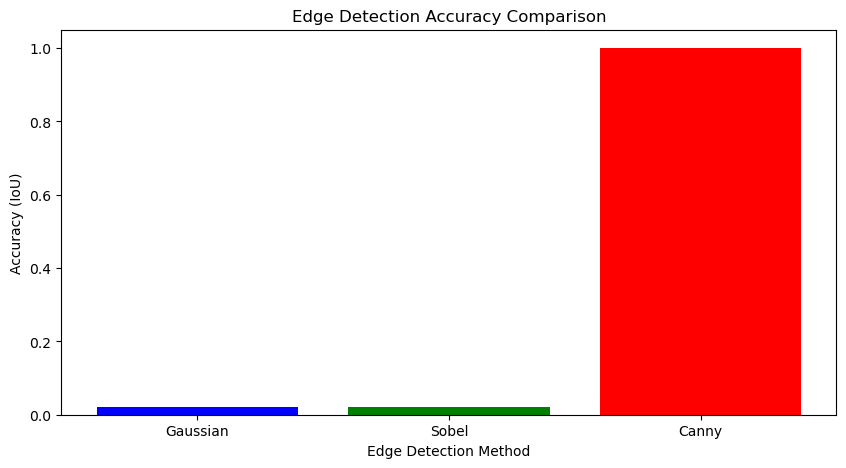

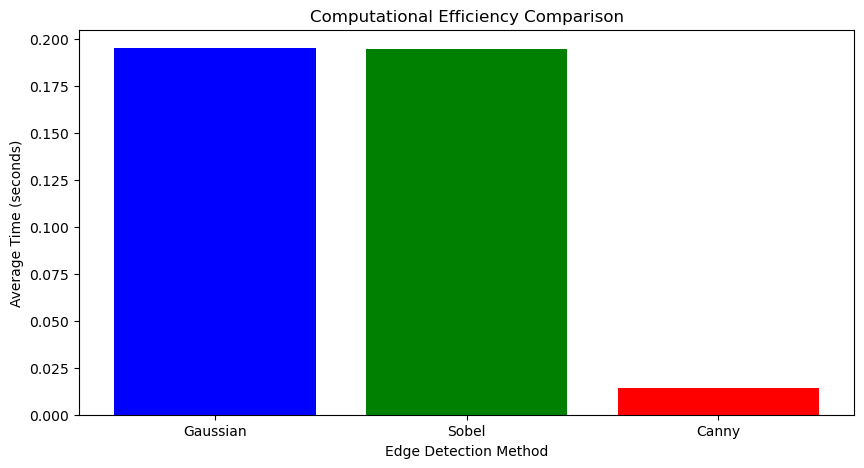

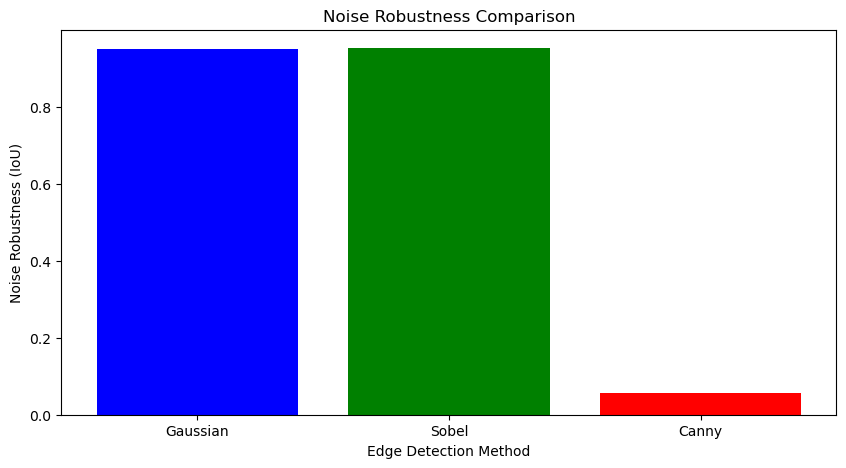

Comparative Analysis Report:
Edge Detection Accuracy (IoU):
Gaussian: 0.021311992142892085
Sobel: 0.021321472964086055
Canny: 1.0

Computational Efficiency (Average Time in seconds):
Gaussian: 0.19531448682149252
Sobel: 0.1949927806854248
Canny: 0.014487107594807943

Noise Robustness (IoU):
Gaussian: 0.9496062626484312
Sobel: 0.9519107285064147
Canny: 0.05750813298525404


In [9]:
# Comparative Analysis Report

# Present the results of the comparative analysis, including accuracy, efficiency, and robustness metrics for each method.

# Plotting the accuracy results
methods = ['Gaussian', 'Sobel', 'Canny']
accuracy_means = [np.mean(accuracies['Gaussian']), np.mean(accuracies['Sobel']), np.mean(accuracies['Canny'])]

plt.figure(figsize=(10, 5))
plt.bar(methods, accuracy_means, color=['blue', 'green', 'red'])
plt.xlabel('Edge Detection Method')
plt.ylabel('Accuracy (IoU)')
plt.title('Edge Detection Accuracy Comparison')
plt.show()

# Plotting the computational efficiency results
efficiency_means = [np.mean(gaussian_times), np.mean(sobel_times), np.mean(canny_times)]

plt.figure(figsize=(10, 5))
plt.bar(methods, efficiency_means, color=['blue', 'green', 'red'])
plt.xlabel('Edge Detection Method')
plt.ylabel('Average Time (seconds)')
plt.title('Computational Efficiency Comparison')
plt.show()

# Plotting the noise robustness results
robustness_means = [np.mean(gaussian_robustness), np.mean(sobel_robustness), np.mean(canny_robustness)]

plt.figure(figsize=(10, 5))
plt.bar(methods, robustness_means, color=['blue', 'green', 'red'])
plt.xlabel('Edge Detection Method')
plt.ylabel('Noise Robustness (IoU)')
plt.title('Noise Robustness Comparison')
plt.show()

# Displaying the comparative analysis results
print("Comparative Analysis Report:")
print("Edge Detection Accuracy (IoU):")
print("Gaussian:", np.mean(accuracies['Gaussian']))
print("Sobel:", np.mean(accuracies['Sobel']))
print("Canny:", np.mean(accuracies['Canny']))

print("\nComputational Efficiency (Average Time in seconds):")
print("Gaussian:", np.mean(gaussian_times))
print("Sobel:", np.mean(sobel_times))
print("Canny:", np.mean(canny_times))

print("\nNoise Robustness (IoU):")
print("Gaussian:", np.mean(gaussian_robustness))
print("Sobel:", np.mean(sobel_robustness))
print("Canny:", np.mean(canny_robustness))